In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import comet_ml
from comet_ml import Experiment

In [3]:
import os
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
import pytorch_lightning as pl
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import CometLogger

In [4]:
from manifoldembedder import *

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.size': 14})

In [6]:
basedir = '/nobackup/users/sangeon/datasets/jetGridpack/jetpairs'


In [7]:
train_file_list = []
val_file_list = []
test_file_list = []
predict_file_list = []

basedir = '/nobackup/users/sangeon/datasets/jetGridpack/jetpairs'

for file in os.listdir(basedir):
    if "train" in file:
        train_file_list.append(os.path.join(basedir,file))
    elif "val" in file:
        val_file_list.append(os.path.join(basedir,file))
    elif "predict" in file:
        predict_file_list.append(os.path.join(basedir,file))
    elif "test" in file:
        test_file_list.append(os.path.join(basedir,file))

In [8]:
#train_file_list

In [9]:
predict_file_list

['/nobackup/users/sangeon/datasets/jetGridpack/jetpairs/taus_Gridpack_jetpair_predict_extrafeats.pickle',
 '/nobackup/users/sangeon/datasets/jetGridpack/jetpairs/Gridpack_jetpredict_16part_merged.pt',
 '/nobackup/users/sangeon/datasets/jetGridpack/jetpairs/taus_Gridpack_jetpair_predict.pt',
 '/nobackup/users/sangeon/datasets/jetGridpack/jetpairs/Gridpack_jetpair_predict_extrafeats.pickle',
 '/nobackup/users/sangeon/datasets/jetGridpack/jetpairs/interpolate_Gridpack_jetpair_predict.pt']

In [10]:
#train_list = []
#for file in train_file_list:
#    train_list.append(torch.load(file))
#jet_train = torch.utils.data.ConcatDataset(train_list)
#torch.save(jet_train, os.path.join(basedir, 'Gridpack_jettrain_16part_merged.pt'))

#val_list = []
#for file in val_file_list:
#    val_list.append(torch.load(file))
#jet_val = torch.utils.data.ConcatDataset(val_list)
#torch.save(jet_val, os.path.join(basedir, 'Gridpack_jetval_16part_merged.pt'))

#test_list = []
#for file in test_file_list:
#    test_list.append(torch.load(file))
#jet_test = torch.utils.data.ConcatDataset(test_list)
#torch.save(jet_test, f'/nobackup/users/sangeon/datasets/jets/concat_16p_test_temp.pt')

#predict_list = []
#for file in predict_file_list:
#    predict_list.append(torch.load(file))
#jet_predict = torch.utils.data.ConcatDataset(predict_list)
#torch.save(jet_predict, f'/nobackup/users/sangeon/datasets/jets/concat_predict_temp.pt')

In [11]:
file_dict = {'train':os.path.join(basedir, 'Gridpack_jettrain_16part_merged.pt'),
             'val':os.path.join(basedir, 'Gridpack_jetval_16part_merged.pt'),
             'test':None,
             'predict':os.path.join(basedir, 'Gridpack_jetpredict_16part_merged.pt')}

In [12]:
#file_dict = {'train':'/nobackup/users/sangeon/datasets/jets/jet_pair_train_temp.pt', 'val':'/nobackup/users/sangeon/datasets/jets/jet_pair_val_temp.pt','test':'/nobackup/users/sangeon/datasets/jets/jet_pair_test_temp.pt', 'predict':'/nobackup/users/sangeon/datasets/jets/concat_predict_temp.pt'}

In [13]:
#file_dict = {'train':'/nobackup/users/sangeon/datasets/jets/concat_triplet_train_temp.pt', 'val':'/nobackup/users/sangeon/datasets/jets/concat_triplet_val_temp.pt','test':'/nobackup/users/sangeon/datasets/jets/concat_triplet_test_temp.pt', 'predict':'/nobackup/users/sangeon/datasets/jets/concat_predict_temp.pt'}

# 16 particles

In [14]:
#file_dict = {'train':'/nobackup/users/sangeon/datasets/jets/concat_16p_train_temp.pt', 'val':'/nobackup/users/sangeon/datasets/jets/concat_16p_val_temp.pt','test':'/nobackup/users/sangeon/datasets/jets/concat_16p_test_temp.pt', 'predict':'/nobackup/users/sangeon/datasets/jets/jet_16p_predict_temp.pt'}

In [15]:
#dataset = torch.load('/nobackup/users/sangeon/datasets/jets/concat_train_temp.pt')

In [16]:
#jetpair_train = DataLoader(dataset, batch_size=10000,shuffle=True,num_workers=4)

# Paper

In [20]:
jet_dm = JetDataModule(file_dict,1000)
#jettriplet_dm = 

In [21]:
#emd = np.array([])
#for i,(_,_,dist) in enumerate(jetpair_train):
#    if i>100:
#        break
#    emd = np.concatenate([emd,dist.data.numpy()])

In [22]:
#emd

In [23]:
#plt.hist(emd)

In [24]:
#d_model, nhead, num_encoder_layers, num_decoder_layers, embed_dim, max_seq_length, pos_dropout, trans_dropout, layer_widths

In [25]:
#lr, npart, embed_dim, hidden_size, num_rnn_layers, layer_widths

In [26]:

#next
#model = ManifoldEmbedder("jets",2,"Transformer", 0.00054607179632484, [32, 4, 3, 2, 2, 16, 0.2,0.20, [1000,400,20]])


#model = HyperbolicEmbedder("jets",2,"Transformer", 0.00054607179632484, 1e-8, 1e-4, [32,4,3,2,2,16,0.25,0.25,[1000,500,20]])



model = WassersteinEmbedder("jets",2,"Transformer", 0.00054607179632484, 50, 1e-3, [32,4,3,2,100,16,0.25,0.25,[1000,400,100]])

#[32,4,3,2,2,16,0.25,0.25,[1000,400,20]]


true
true
true
true
true
true
true
true
true
true
true
true
true
true
true


In [27]:
# Create an experiment with your api key
experiment = Experiment(
    api_key="CkkrVkSk6Vr2WKlbXIzlkhNlE",
    project_name="metricembedder",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/sangeonpark/metricembedder/d1cec423864d47a380d998e060932b0b



In [28]:
comet_logger = CometLogger(
    api_key="CkkrVkSk6Vr2WKlbXIzlkhNlE",
    project_name="metricembedder",
)

CometLogger will be initialized in online mode


In [29]:
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=0.00, patience=5, verbose=False)

In [30]:
checkpoint_callback = ModelCheckpoint(
    monitor="val_loss",
    dirpath="/home/sangeon/ToyJetGenerator/training/simulatedtoyjets_checkpoints",
    filename="Transformer-paper-wasserstein-try1-{epoch:02d}-{val_loss:.2f}",
    save_top_k=4,
    mode="min",
)

In [31]:
trainer = Trainer(gpus=1,callbacks=[PrintCallbacks(),early_stop_callback,checkpoint_callback],logger=comet_logger,auto_lr_find=True)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Starting to init trainer!
Trainer is init now


In [32]:
#trainer.tune(model, jetpair_dm)

In [33]:
lr_finder = trainer.tuner.lr_find(model, jet_dm)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Set SLURM handle signals.


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

Restoring states from the checkpoint path at /home/sangeon/ToyJetGenerator/training/lr_find_temp_model_e576c145-f3d8-4a18-bb8b-32c6e6459f36.ckpt


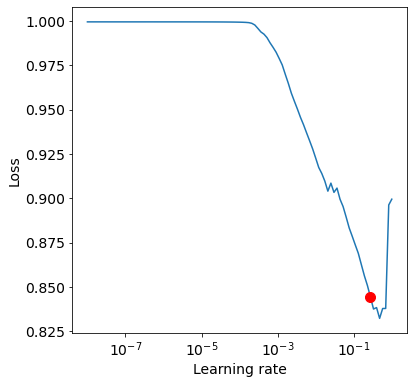

In [34]:
fig = lr_finder.plot(suggest=True)
fig.show()

In [35]:
new_lr = lr_finder.suggestion()

In [36]:
new_lr

0.2754228703338169

In [37]:
model.hparams.learning_rate = new_lr

In [38]:
model.learning_rate = new_lr

In [39]:
model.learning_rate

0.2754228703338169

In [ ]:
trainer.fit(model, jet_dm)

/nobackup/users/sangeon/condas/anaconda3/envs/studies/lib/python3.8/site-packages/pytorch_lightning/core/datamodule.py:469: LightningDeprecationWarning: DataModule.setup has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.setup.
  rank_zero_deprecation(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/sangeonpark/metricembedder/d1cec423864d47a380d998e060932b0b
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     loss [20] : (0.577634562630456, 0.9994972591445545)
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (1.22 MB)
COMET INFO:  

Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [ ]:
os.getcwd()

In [ ]:
#checkpoint = torch.load("./simulatedtoyjets_checkpoints/Transformer-paper-v0-checkpoint-epoch=01-val_loss=0.48.ckpt")

In [ ]:
#print(checkpoint["hyper_parameters"])

In [ ]:
model = HyperbolicEmbedder.load_from_checkpoint("./simulatedtoyjets_checkpoints/Transformer-paper-hyperbolic-try1-epoch=13-val_loss=0.22.ckpt")

In [ ]:
model.eval()

In [ ]:
#predictloader = jet_dm.predict_dataloader()

In [28]:
#for temp in predictloader:
#    print(temp[0][0])

In [36]:
a = trainer.predict(model, jet_dm)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/sangeonpark/metricembedder/9faf908d0b4346dcbb83f9d9c47c20df
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (1.22 MB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1
COMET INFO: ---------------------------
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/sangeonpark/metricembedder/ea9

Predicting: 0it [00:00, ?it/s]

/nobackup/users/sangeon/condas/anaconda3/envs/studies/lib/python3.8/site-packages/pytorch_lightning/loops/epoch/prediction_epoch_loop.py:172: UserWarning: Lightning couldn't infer the indices fetched for your dataloader.
  warning_cache.warn("Lightning couldn't infer the indices fetched for your dataloader.")
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/sangeonpark/metricembedder/ea99b2fa34994434878cd5cd73680a82
COMET INFO:   Parameters:
COMET INFO:     backbone_type : Transformer
COMET INFO:     data_npair    : 2
COMET INFO:     data_type     : jets
COMET INFO:     epsilon       : 1e-09
COMET INFO:     init_weights  : 1e-05
COMET INFO:     learning_rate : 0.0002089296130854041
COMET INFO:     modelparams   : [32, 4, 3, 2, 2, 16, 0.25, 0.25, [500, 500, 40]]
COMET INFO:   Uploads:
COMET INFO:

In [37]:
label = np.array([])
embedding = np.empty((0,2))
for batch in a:
    #print(batch[0].shape)
    #print(batch[1].shape)
    embedding = np.vstack((embedding, batch[0].cpu().numpy()))
    label = np.concatenate([label, batch[1].cpu().numpy()])
    #print(batch[0], batch[1])

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.size': 14})

In [39]:
embedding[label==2]

array([[0.54185009, 0.73398985],
       [0.51257071, 0.71768647],
       [0.52612391, 0.71716179],
       ...,
       [0.52902307, 0.71939873],
       [0.53167478, 0.7098414 ],
       [0.54418424, 0.73085263]])

In [40]:
embedding[label==4]

array([[0.49878302, 0.70556033],
       [0.51748565, 0.71456741],
       [0.51625133, 0.71435254],
       ...,
       [0.50098188, 0.71079117],
       [0.5302532 , 0.71858597],
       [0.52012547, 0.71829415]])

In [41]:
embedding[label==3]

array([[0.5359536 , 0.73200953],
       [0.52842402, 0.72643511],
       [0.53769566, 0.73374208],
       ...,
       [0.53343913, 0.72073348],
       [0.53840547, 0.72384206],
       [0.53289389, 0.73029156]])

In [42]:
embedding[label==1]

array([[0.53372857, 0.72965276],
       [0.52685131, 0.72703955],
       [0.53703055, 0.7324516 ],
       ...,
       [0.53379502, 0.7304209 ],
       [0.53708514, 0.73231076],
       [0.53754622, 0.73241995]])

In [43]:
namelist = ['QCD','2p25','2p170','3p25','3p170','4p170','4p400']

Text(0.5, 1.0, 'Simulated Jet Embedding')

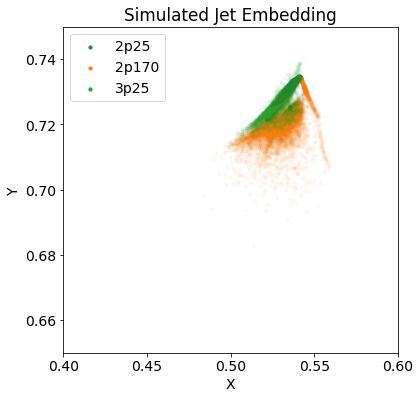

In [52]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for i in range(1,4):
    ax.scatter(embedding[label==i][:10000,0],embedding[label==i][:10000,1],s=10,alpha=0.04,label=namelist[i])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim([0.4,0.6])
ax.set_ylim([0.65,0.75])
leg = ax.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    
ax.set_title('Simulated Jet Embedding')    
#fig.savefig(f'../figures/paper/embedding_simulated_toyjet_v1.png')    
#fig.savefig(f'../figures/paper/embedding_simulated_toyjet_v1.pdf')

Text(0.5, 1.0, 'Simulated Jet Embedding')

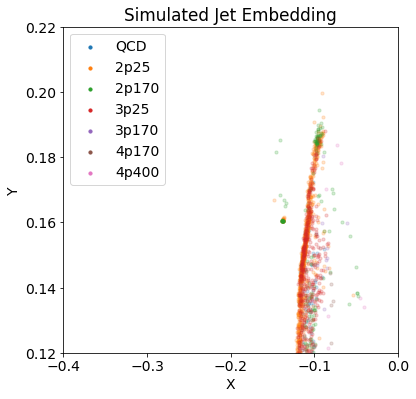

In [49]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for i in range(7):
    ax.scatter(embedding[label==i][:1000,0],embedding[label==i][:1000,1],s=10,alpha=0.20,label=namelist[i])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim([-0.4,0.0])
ax.set_ylim([0.12,0.22])
leg = ax.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    
ax.set_title('Simulated Jet Embedding')    
#fig.savefig(f'../figures/paper/embedding_simulated_toyjet_v1.png')    
#fig.savefig(f'../figures/paper/embedding_simulated_toyjet_v1.pdf')

In [38]:
embedding[label==1][:1000].shape

(1000, 2)

In [39]:
from scipy import stats

def plot_kde(ax, whichlabel, color):
    #xmin = embedding[label==whichlabel][:,0].min()
    #xmax = embedding[label==whichlabel][:,0].max()
    #ymin = embedding[label==whichlabel][:,1].min()
    #ymax = embedding[label==whichlabel][:,1].max()
    xmin, xmax = [-0.5,0.3]
    ymin, ymax = [0,0.35]
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    kernel = stats.gaussian_kde(embedding[label==whichlabel][:10000].T)
    Z = np.reshape(kernel(positions).T, X.shape)
    Z /= Z.max()
    print(Z.max(),Z.min())
    #ax.imshow(np.rot90(Z),cmap='Blues' , extent=[xmin, xmax, ymin, ymax])
    CS = ax.contour(X,Y,Z,levels=[0.3,0.6],colors=color, alpha=0.8)
    #ax.contour(X,Y,Z,levels=1,colors=color)
    return CS


1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0


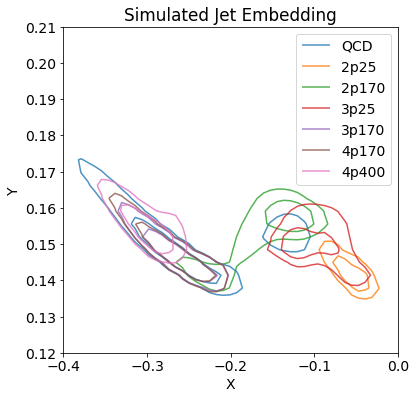

In [74]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
####ax.scatter(embedding[label==0][:50,0],embedding[label==0][:50,1],s=200,alpha=0.1,label='0')
####ax.scatter(embedding[label==1][:50,0],embedding[label==1][:50,1],s=200,alpha=0.1,label='1')
#ax.scatter(embedding[label==2][:100,0],embedding[label==2][:100,1],s=200,alpha=0.1,label='2')
#ax.scatter(embedding[label==3][:100,0],embedding[label==3][:100,1],s=200,alpha=0.1,label='3')
#ax.scatter(embedding[label==4][:100,0],embedding[label==4][:100,1],s=200,alpha=0.1,label='4')
####ax.scatter(embedding[label==5][:50,0],embedding[label==5][:50,1],s=200,alpha=0.1,label='5')
####ax.scatter(embedding[label==6][:50,0],embedding[label==6][:50,1],s=200,alpha=0.1,label='6')
#ax.scatter(embedding[label==7][:100,0],embedding[label==7][:100,1],s=200,alpha=0.1,label='7')
#ax.scatter(embedding[label==8][:100,0],embedding[label==8][:100,1],s=200,alpha=0.1,label='8')
####ax.scatter(embedding[label==9][:50,0],embedding[label==9][:50,1],s=200,alpha=0.1,label='9')
#ax.imshow(np.rot90(Z),cmap='Blues' , extent=[xmin, xmax, ymin, ymax])
lines = []
for i in range(7):
    CS = plot_kde(ax, i, f'C{i}')
    lines.append(CS.collections[0])
#plot_kde(ax, 1,'C0')
#plot_kde(ax, 2,'C1')
#plot_kde(ax, 3,'C2')
#plot_kde(ax, 4,'C3')

#print(ax.collections[0].get_color()=='C0')
#print(ax.collections[0].set_label("QCD"))
#print(ax.collections[4].set_label("twoprong"))
#print(ax.collections[6].set_label("threeprong"))
#print(ax.collections[10].set_label("fourprong"))

#for i in range(7)

#lines = [ CS_list[0].collections[0], CS_list[1].collections[0], CS_list[2].collections[0], CS_list[0].collections[0],CS_list[0].collections[0],CS_list[0].collections[0],CS_list[0].collections[0]]
#labels = ['CS1_neg','CS1_pos','CS2_neg','CS2_pos']
#plt.legend(lines, labels)
#print(ax.collections[1].get_color()=='C0')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim([-0.4,0.0])
ax.set_ylim([0.12,0.21])
ax.legend(lines, namelist)
ax.set_title('Simulated Jet Embedding')    
fig.savefig(f'../figures/paper/embedding_simulatedtoyjet_smoothed_v1.png')
fig.savefig(f'../figures/paper/embedding_simulatedtoyjet_smoothed_v1.pdf')

(-100.0, 100.0)

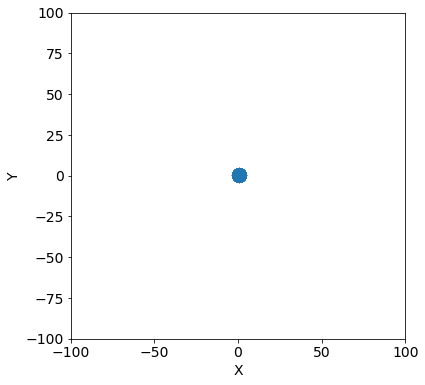

In [101]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
#ax.scatter(embedding[label==0][:1000,0],embedding[label==0][:1000,1],s=200,alpha=0.05)
ax.scatter(embedding[label==1][:100,0],embedding[label==1][:100,1],s=200,alpha=0.05)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(-100,100)
ax.set_ylim(-100,100)
#fig.savefig(f'{path}/{name}.png')

In [42]:
embedding[label==0]

array([[34.16513062, -1.49830151],
       [34.1387825 , -1.53783011],
       [34.53158569, -0.93025315],
       ...,
       [34.1339798 , -1.54286742],
       [30.40222168,  5.07749081],
       [34.23294067, -1.4946003 ]])

In [43]:
embedding[label==1]

array([[34.15142822, -1.52005196],
       [34.01434708, -1.64321101],
       [34.10200119, -1.60349095],
       ...,
       [34.09588623, -1.59495401],
       [34.40365982, -1.46968496],
       [34.20943451, -1.48509216]])

In [41]:
label

array([0., 0., 0., ..., 1., 1., 1.])

In [ ]:
experiment.end()

In [ ]:
import tensorboard

In [11]:
%load_ext tensorboard